<img src="pds_banner.png" style="height:200px">


# Laboratorio 5 Procesamiento de señales 2019-1

# Introduccion a la transformada de Fourier

## Universidad de Antioquia

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## 2. Transformada de Fourier para señales discretas

La transformada discreta Fourier para la señal $\mathrm{x[n]}$ se define de acuerdo con la siguiente ecuación.

$$    X[k]=\sum_{n=0}^{N-1}x[n]\cdot e^{\frac{-j\cdot2\pi k\cdot n}{N}}=\sum_{n=0}^{N-1}x[n]\cdot \mathbf{U}[k,n]$$

Donde $\mathbf{U}\in \mathbb{R}^{N\times K}$ representa una matriz de transformación, que se puede definir con la siguiente ecuación. 


 $$   \mathbf{U}=\frac{1}{\sqrt{N}}\left [ \exp \left (\frac{j\cdot2\pi k\cdot n}{N}\right) \right ]_{n \in \{ 0, N-1\}, k \in {0, NFFT}}$$
 
 Donde $N$ es el número de muestras de la señal, y $\mathrm{NFFT}$ es el número de puntos de la transformada de Fourier que se desea calcular (debe ser una potencia de 2).
 
 El número de puntos de la transformada de Fourier define la resolución en frecuencia, donde cada índice mapea el contenido de frecuencia de la señal en un rango normalizado entre 0 y $2\pi$ rad/seg. Cada índice también mapea la frecuencia de muestreo entre 0 y $fs$, por lo tanto, para encontrar la equivalencia entre la frecuencia normalizada, y la frecuencia en Hz, se debe multiplicar la frecuencia normalizada por ($fs/2$).

Luego de definir la matriz, se puede redefinir la transformada de Fourier como una multiplicación de una matriz y un vector (columna).


$$X=\mathbf{U^*}\cdot \mathbf x$$


La siguiente función construye la matriz $\mathbf{U}$ de transformación.

In [4]:
def dftmatrix(N, Nfft):
    #construct DFT matrix
    k= np.arange(Nfft)
    if N is None: N = Nfft
    n = np.arange(N)
    U = np.matrix(np.exp(1j* 2*np.pi/Nfft *k*n[:,None])) 
    return U/np.sqrt(Nfft)

Para calcular la transformada de Fourier de la señal $x[n]$ se usa la siguiente expresión. $X=U.H*\mathbf x$ # donde U.H significa el complejo conjugado de la matriz $\mathbf{U}$

### Calcular la frecuencia de una señal sinusoidal

Se va a generar una señal sinusoidal con una frecuencia de 330 Hz una frecuencia de muestreo de 4000 Hz

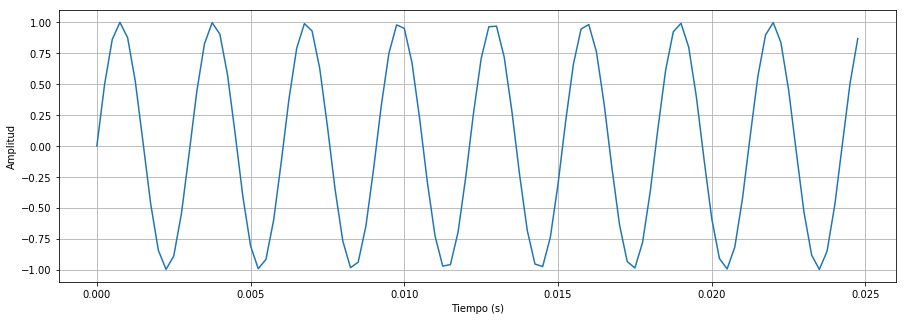

In [5]:
f=330
fs=4000
tmax=1

t= np.arange(0,tmax, 1/fs)

x=np.sin(2*np.pi*f*t)

plt.figure(figsize=(15,5))
plt.plot(t[0:100],x[0:100])
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

Calculamos la transformada de Fourier de la señal sinusoidal creada, de acuerdo con la explicacion anterior

In [6]:
U =dftmatrix(N=len(x), Nfft=fs)
print(U.shape)
x.shape=(len(x),1) # Convierto en vector columna para poder multiplicar con la matriz

X=U.H*x # X es la transformada de Fourier de x

(4000, 4000)


En terminos simples, la DFT toma una señal y calcula cuales frecuencias estan presentes en ella. En términos mas tecnicos, la DFT transforma la señal del dominio del tiempo al dominio de la frecuencia.

```X``` es un arreglo que contiene las distintas frecuencias presentes en la señal sinusoidal original.

<span style="color:red"> En nuestro caso particular tenemos una resolucion de 1Hz, lo que quiere decir que cada valor del arreglo X contiene la informacion de cada componente en frecuencia separadas 1 Hz (X[1] corresponde a la informacion a 1Hz, X[20] la informacion a 20 Hz, etc), por que? </span>

Sin embargo, nos encontramos con un pequeño problema, La DFT retorna un arreglo de numeros complejos, que parece no tener mucho sentido inicialmente. Si imprimimos los primeros 8 valores de X, podemos ver los siguiente

In [5]:
print(X[0:8])

[[ 1.20164295e-14+0.00000000e+00j]
 [-8.79504802e-15-3.69273500e-15j]
 [ 5.29611077e-15-1.14909506e-15j]
 [-4.14598911e-15+8.73082937e-15j]
 [ 1.80636756e-14+3.84281908e-17j]
 [-8.64412708e-15-5.12824917e-15j]
 [ 2.62290190e-15+7.19595824e-15j]
 [-1.76855058e-14+9.26124140e-15j]]


<span style="color:red"> Que significan estos valores especificos? </span>

Vamos a considerar por ahora solo la informacion de amplitud de la DFT

In [8]:
Xabs=np.abs(X)
print(X.shape)

(4000, 1)


Nuevamente, consideramos solo los primeros 8 valores de la DFT, tenemos lo siguiente

In [7]:
print(Xabs[0:8])

[[1.20164295e-14]
 [9.53882391e-15]
 [5.41933656e-15]
 [9.66522670e-15]
 [1.80637164e-14]
 [1.00508643e-14]
 [7.65907497e-15]
 [1.99636597e-14]]


<span style="color:red"> Por que estos valores on peque˜nos? </span>

<span style="color:red">Por el contrario, si vemos X[330] podemos ver un valor grande, por que?</span>

In [8]:
print(Xabs[330])

print(np.argmax(Xabs))

[[31.6227766]]
330


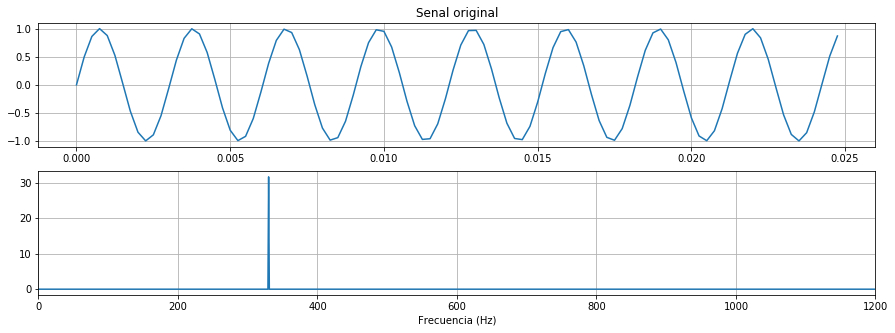

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
plt.plot(t[:100], x[:100])
plt.title("Senal original")
plt.grid()
plt.subplot(2,1,2)
plt.plot(Xabs)
plt.xlabel("Frecuencia (Hz)")
plt.xlim(0,1200)
plt.grid()
plt.show()

Y de esta forma se encuentran las frecuencias presentes en una señal. 

A continuacion veremos que sucede cuando se tienen varias frecuencias presentes en la señal y queremos separar las señales originales.

## Eliminacion de ruido de una señal sinusoidal

En este ejemplo, adcionaremos una señal de ruido con una frecuencia de 60 Hz (ruido electrico AC) a nuestra señal original, y posteriormente lo vamos a eliminar usando solo la DFT.

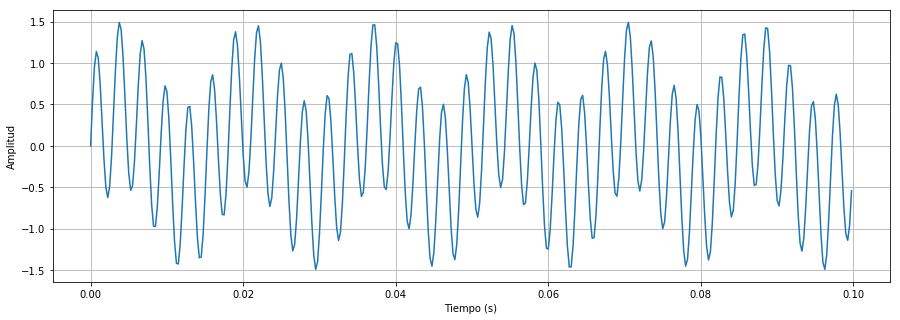

In [10]:
f=330
fnoise=60
fs=4000
tmax=1

t= np.arange(0,tmax, 1/fs)

x=np.sin(2*np.pi*f*t)+0.5*np.sin(2*np.pi*fnoise*t)

plt.figure(figsize=(15,5))
plt.plot(t[0:400],x[0:400])
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

Calculamos la DFT de la señal con ruido obtenida (Usamos el metodo encontrado en numpy)

In [11]:
X = np.fft.fft(x)
 
X = (np.abs(X[:len(X)]))

(0, 1200)

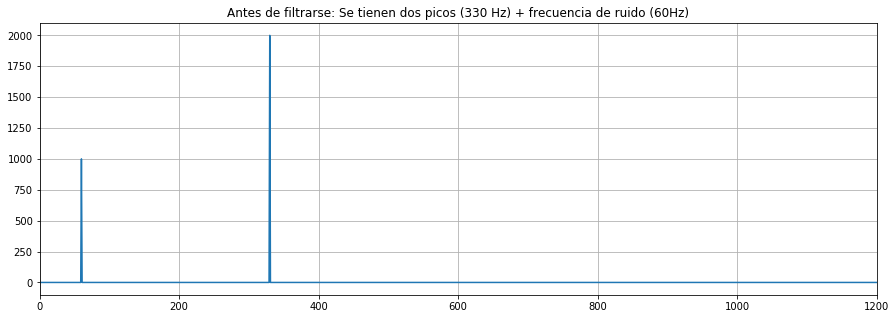

In [12]:
plt.figure(figsize=(15,5))
plt.plot(X)
 
plt.title("Antes de filtrarse: Se tienen dos picos (330 Hz) + frecuencia de ruido (60Hz)")
plt.grid()
plt.xlim(0,1200)

Ahora vamos a eliminar el ruido, usando solamente la DFT. (Tecnicas de filtrado mas robustas las veremos mas adelante)

In [14]:
index=0
filtered_X=[]
for f in X:
    # Filtro entre los limites bajo y alto
    # Se escoge entre 325 y 335, Tan cercanos a 330. En aplicaciones reales no se tienen numeros tan exactos.
    if index > 335 and index < 335:
        # Aqui se busca las frecuencias que superen cierta amplitud en la DFT
        if f > 1:
            filtered_X.append(f)
        else:
            filtered_X.append(0)
    else:
        filtered_X.append(0)
index += 1

Otra version. El codigo anterior puede re-escribirse en una sola linea

In [15]:
filtered_X = np.asarray([f if (325 < index < 335 and f > 1) else 0 for index, f in enumerate(X)])

(0, 1200)

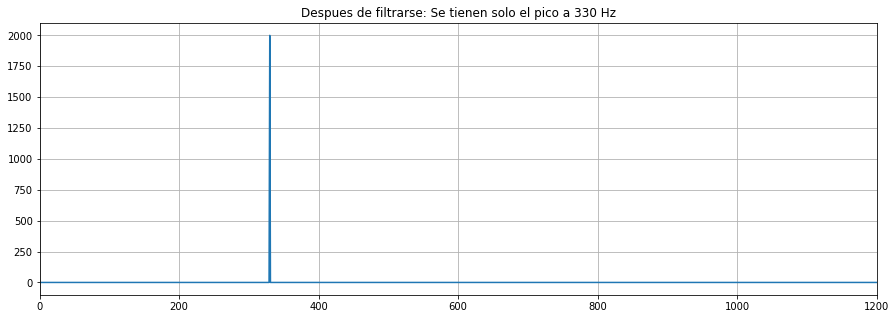

In [16]:
plt.figure(figsize=(15,5))
plt.plot(filtered_X)
 
plt.title("Despues de filtrarse: Se tienen solo el pico a 330 Hz")
plt.grid()
plt.xlim(0,1200)

Para recuperar la señal original, se utiliza la transformada inversa de Fourier

In [16]:
recovered_x = np.fft.ifft(filtered_X)

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


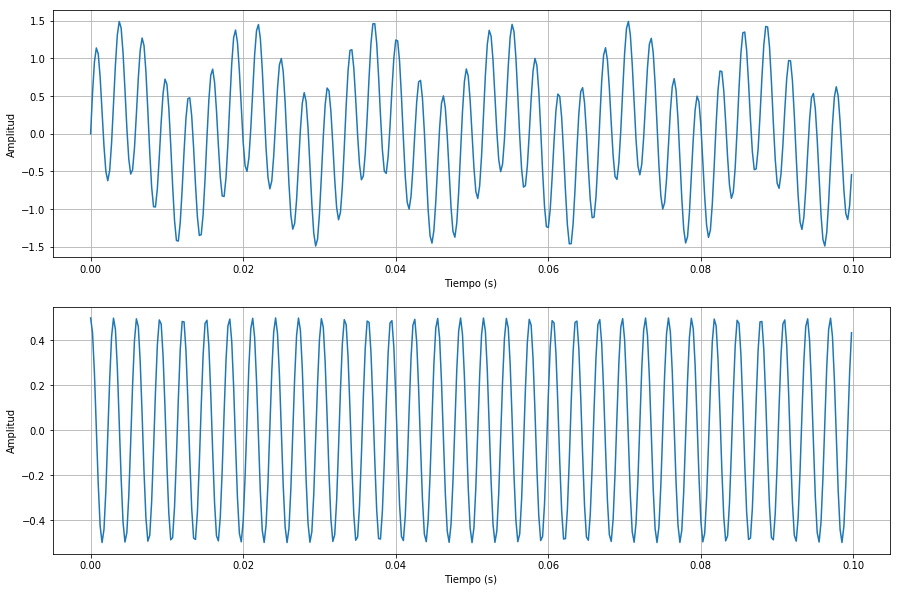

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(t[0:400],x[0:400])
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.subplot(2,1,2)
plt.plot(t[0:400],recovered_x[0:400])
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

<span style="color:red"> Que significa el WARNING mostrado? </span>

# Parte 2. Efecto de la resolucion en frecuencia

<span style="color:red">Genere una señal de acuerdo con el último número de su cédula, de acuerdo con la siguiente lista.</span>


   0. Tren de impulsos con una frecuencia de 100 Hz, y una frecuencia de muestreo de 600 Hz
   1. Señal diente de sierra con una frecuencia de 200\,Hz, y una frecuencia de muestreo de 1000\,Hz
   2. $\sin(2\pi *60*t)+\sin(2\pi *200*t)+\sin(2\pi *500*t)$ con fs=1500\,Hz
   3. Señal cuadrada con una frecuencia de 300\,Hz, y fs=1800\,Hz
   4. $\sin(2\pi *20*t)*\sin(2\pi *200*t)$ con fs=1500\,Hz
   5. $\sin(2\pi *1000*t)+N(0,1)$,  $N(0,1)$ es ruido aleatorio con media cero y desviación estandar 0.1, con fs=3000\,Hz
   6. $\left | \sin(2\pi *100*t) \right| $ con fs=300\,Hz
   7. $\sin(2\pi *t*t)$ con fs=100\,Hz, la señal con una duración de 10 segundos
   8. $\sin(2\pi *10*\sin(2*pi*300*t)*t)$ con fs=1000\,Hz
   9. $(\sin(2\pi *100*t))^2$ con fs=500\,Hz

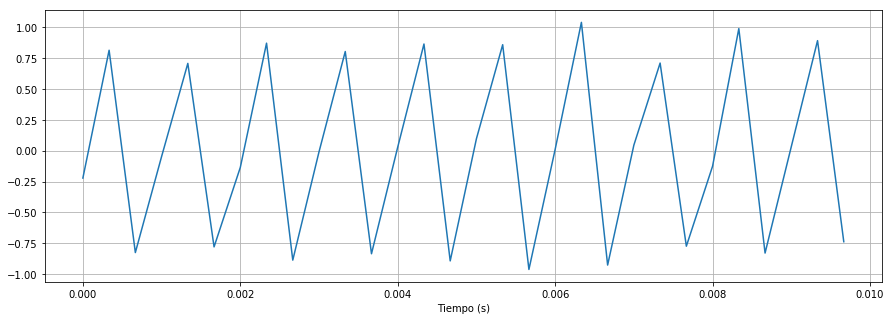

In [18]:
# numero 5

fs=3000
tmax=0.01
t=np.arange(0,tmax, 1/fs)

N=np.random.randn(len(t))*0.1
xt=np.sin(2*np.pi*1000*t)+N

plt.figure(figsize=(15,5))
plt.plot(t,xt)
plt.xlabel("Tiempo (s)")
plt.grid()
plt.show()

<span style="color:red">Calcule la matriz de transformacion U, y calcule y grafique la transformada de Fourier de la señal asignada para distintos valores de $NFFT$. </span>
    
<span style="color:red">    que se puede concluir al respectto?conclusiones. </span>

<span style="color:red">    Por que aparece la DFT para frecuencias positivas y negativas?. </span>

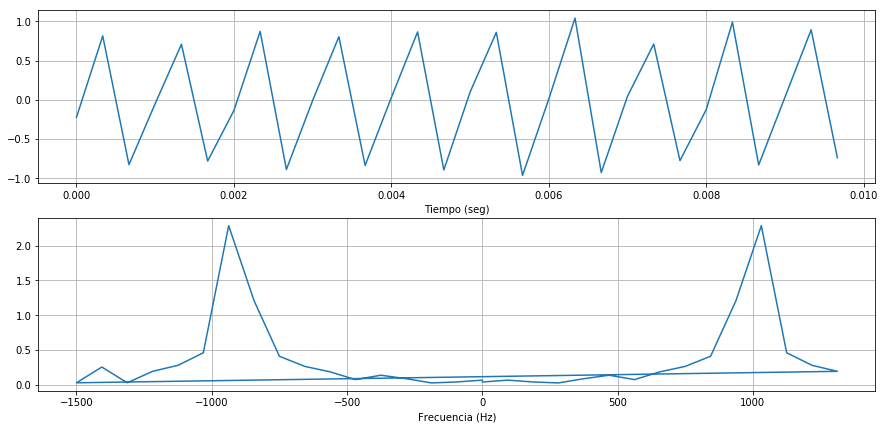

In [19]:
nfft=32
xt.shape=(len(xt),1) # Convierto en vector columna para poder multiplicar con la matriz
U=dftmatrix(len(xt), nfft) # calculo la matriz de transformacion
Xf=U.H*xt[:] # calculo la fft
freq=np.hstack((np.arange(0, nfft/2-1), np.arange(-nfft/2, 1)))*fs/nfft # vector de frecuencias para poder graficar la fft en Hz
# genero graficas
plt.figure(figsize=(15,7))
plt.subplot(211)
plt.plot(t, xt)
plt.grid()
plt.xlabel('Tiempo (seg)')
plt.subplot(212)
plt.plot(freq, np.abs(Xf))
plt.xlabel('Frecuencia (Hz)')
plt.grid()
plt.show()